#Customer Trend Analysis using unsupervised learning models.

#Supermarket Dataset Problem statement

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
df = pd.read_csv("/content/sample_data/SUPERMARKET_CUSTOMERS.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Check for null values 

In [ ]:
df.isna().sum()


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Since customer id col does not provide any info,that row is removed.

In [ ]:
df.drop(["CustomerID"], axis = 1, inplace=True)


##Exploratory data Analysis

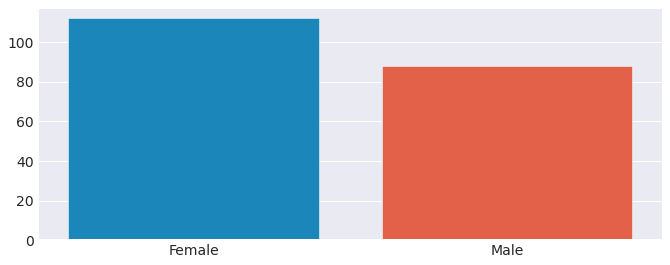

In [ ]:
genders = df.Genre.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

From above we can see the number of female customer is higher than the no of male cusomers

*Let*'s check the correlation coefficients to see which variables are highly correlated 

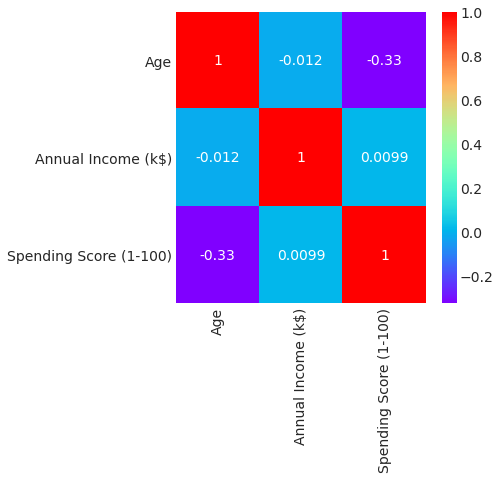

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

Age and Spending Score (1-100) are moderately correlated with correlation of -0.33

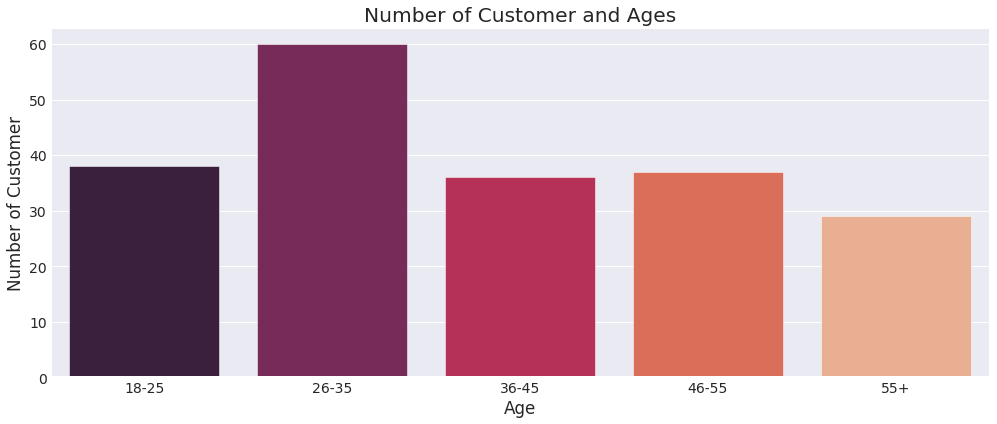

In [ ]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

There are more customers of age group 26-35

Distribution based on spending score

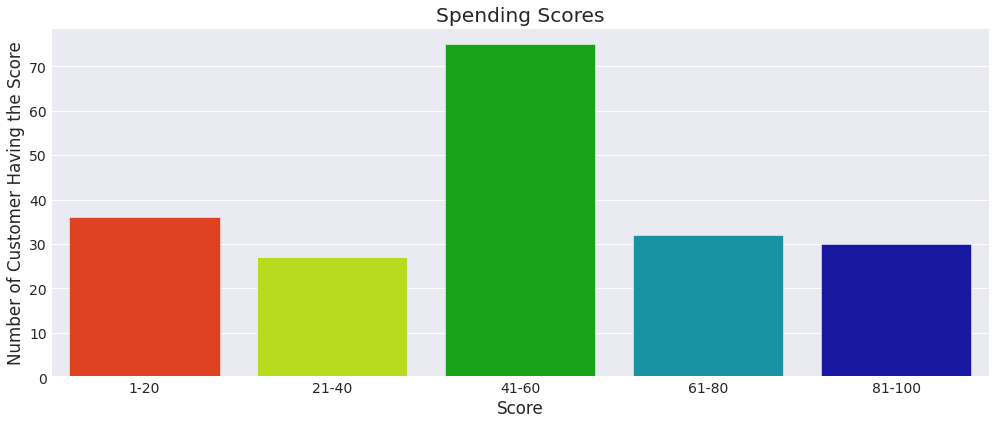

In [ ]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

#MODEL BUIDING
##HIERACHIAL CLUSTERING

In [ ]:
X = df.iloc[:, [2, 3]].values
print(X.shape)



(200, 2)


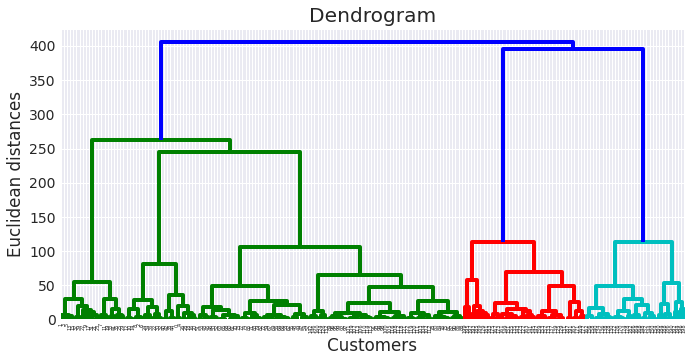

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

####From the given dendogram we know that the number of cluster can be taken as 5

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

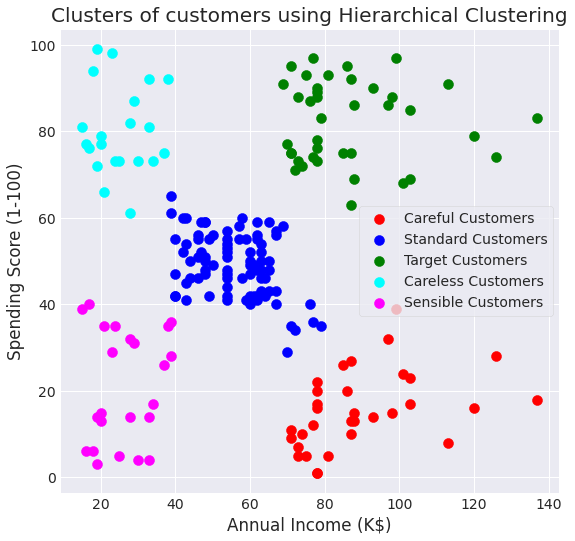

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful Customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard Customers')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target Customers')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Spendthrift Customers')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible Customers')
plt.title('Clusters of customers using Hierarchical Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

The name of clusters is given based on their income and spending. For example, when referring to a customer with low income and high spending, we have used cyan colour. This group indicates ‘Careless Customer’ since despite having a low income, they spend more. To sell a luxurious product, a person with high income and high spending habits should be targeted. This group of customers is represented in magenta colour in the above diagram.

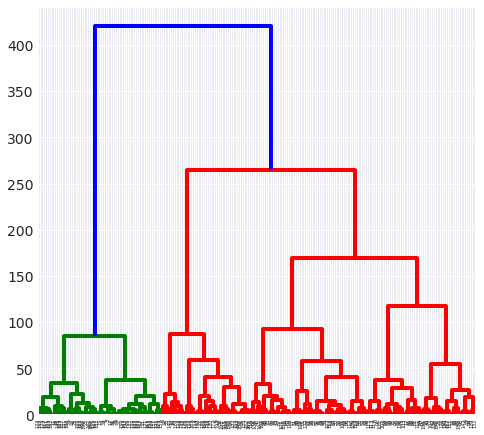

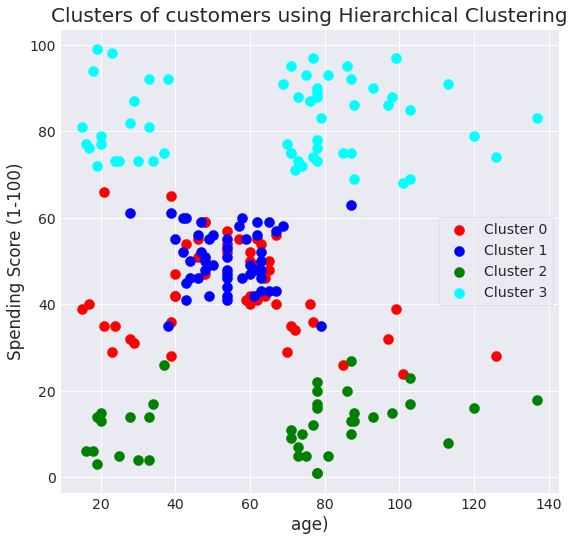

In [ ]:
Y = df.iloc[:, [1, 3]].values
Y.shape
dendrogram = sch.dendrogram(sch.linkage(Y, method = 'ward'))
yc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = yc.fit_predict(Y)
plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], Y[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_hc == 1, 0], Y[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_hc == 2, 0], Y[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_hc == 3, 0], Y[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('Clusters of customers using Hierarchical Clustering')
plt.xlabel('age)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

There are no distinct groups is terms of customers age.

# Model-2: K-Means Clustering

### Let us find the number of cluster using elbow method

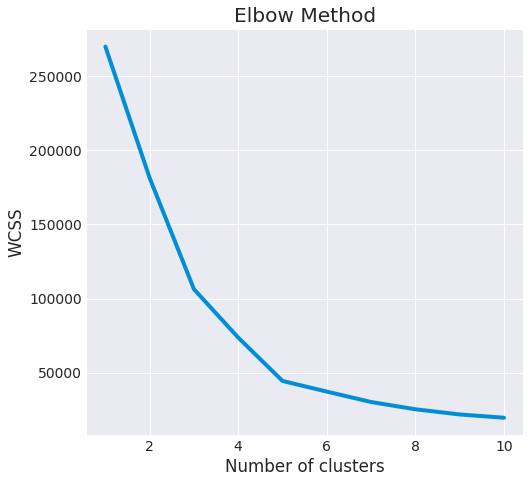

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

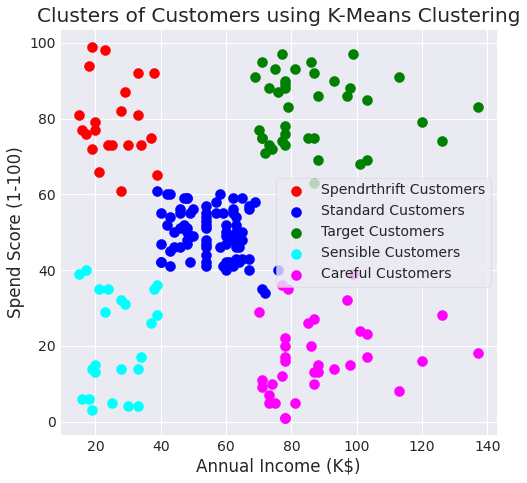

In [ ]:
#From the above graph we could see elbow occurs at 5.So we are taking the number of cluster equal to five.
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(7,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Spendrthrift Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard Customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target Customers')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Careful Customers')
plt.title('Clusters of Customers using K-Means Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spend Score (1-100)')
plt.legend()
plt.show()

Clusters of Customers Based on their Ages

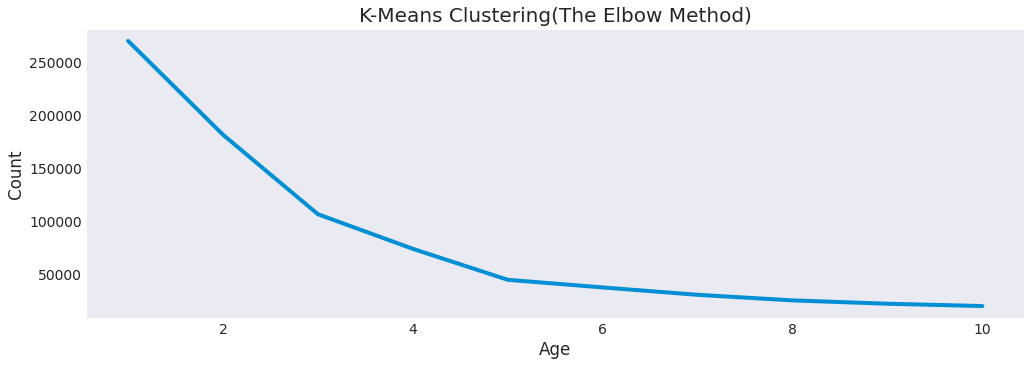

In [ ]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

Taking cluster size =4

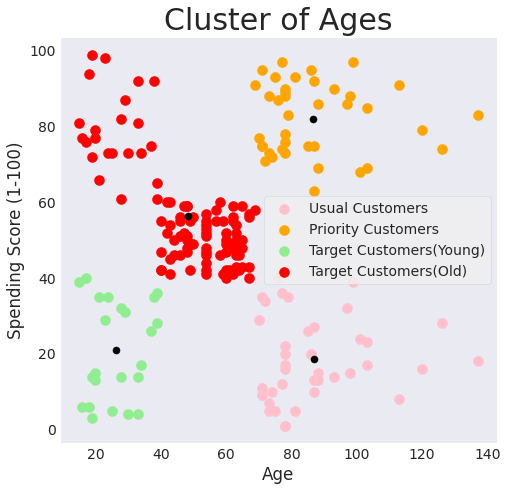

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(X)

plt.rcParams['figure.figsize'] = (7,7)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(X[ymeans == 0, 0], X[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(X[ymeans == 1, 0], X[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(X[ymeans == 2, 0], X[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(X[ymeans == 3, 0], X[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

#Model 3:DBSCAN 

In [ ]:
data = df.iloc[:, [2, 3]].values
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df.drop(["Genre"], axis = 1, inplace=True)

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)   # minpoints - 1
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)
distances[:,1]

array([12.20655562,  4.58257569, 15.13274595,  1.73205081,  7.54983444,
        1.73205081,  7.54983444, 13.03840481, 11.40175425,  6.164414  ,
        9.11043358,  4.12310563,  9.        ,  2.82842712,  7.54983444,
        2.82842712,  3.        ,  9.11043358,  9.11043358,  4.12310563,
        3.        ,  5.74456265, 10.67707825,  6.08276253,  7.07106781,
        7.87400787,  5.19615242, 11.70469991,  5.19615242,  7.48331477,
        7.61577311,  7.21110255,  7.61577311,  7.81024968,  7.07106781,
        7.28010989,  7.68114575,  9.05538514, 10.24695077,  7.28010989,
       13.15294644,  7.81024968,  6.4807407 ,  3.74165739,  8.06225775,
        8.06225775,  3.74165739,  5.38516481,  2.        ,  2.        ,
        3.46410162,  3.74165739,  5.83095189,  6.4807407 ,  4.35889894,
        5.        ,  3.46410162,  4.58257569,  5.83095189,  4.35889894,
        3.16227766,  4.47213595,  4.24264069,  6.4807407 ,  4.12310563,
        1.        ,  7.        ,  4.24264069,  1.        ,  6.70

# Plotting K-distance Graph to find eps

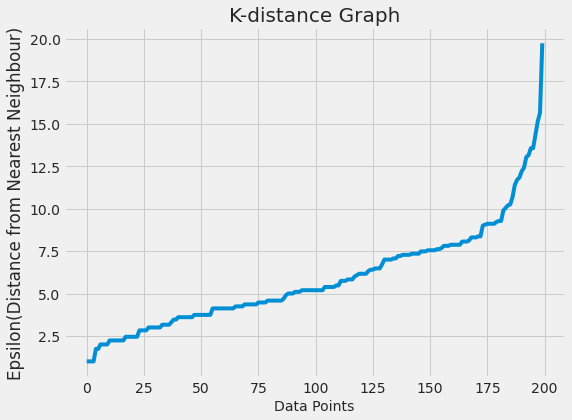

In [ ]:

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,6))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points',fontsize=14)
plt.ylabel('Epsilon(Distance from Nearest Neighbour)')
plt.show()

From above we could say eps value=11

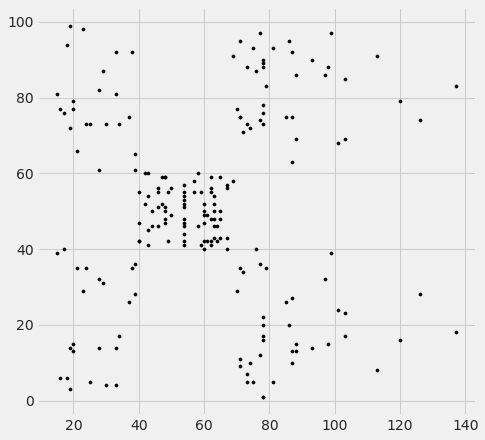

In [ ]:
plt.scatter(data[:, 0], data[:, 1], s = 10, c = 'black')

Min sample value=6 as we are considering 3 features 

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=11, min_samples=6).fit(df)
#df['Labels'] = dbscan.labels_
labels = dbscan.fit_predict(data) 
np.unique(labels)

array([-1,  0,  1,  2])

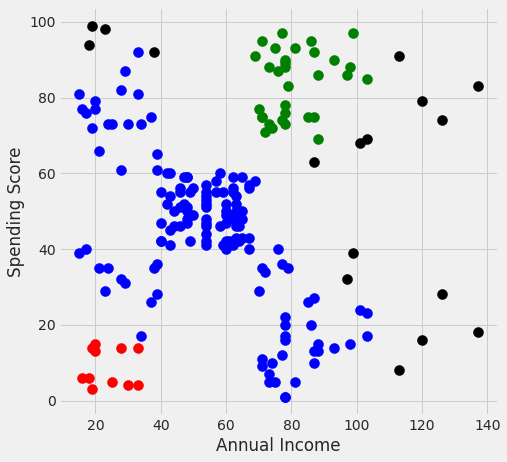

In [ ]:
# Visualising the clusters
plt.figure(figsize=(7,7))
plt.scatter(data[labels == -1, 0], data[labels == -1, 1], s = 100, c = 'black')
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], s = 100, c = 'blue')
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], s = 100, c = 'red')
plt.scatter(data[labels == 2, 0], data[labels == 2, 1], s = 100, c = 'green')



plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

From all 3 models we could say 
##Kmeans,Hierarchial models have provided a more clear insight



##We can conclude
Provide more ads,sale offers for ,Spendthrift,Target customers as they are likely to spend more


Reward standard customers with more offers for being loyal


Improve services to bring more sales from careful customers